Es wird erneut eine Confusion Matrix erstellt, da die 5x5 Matrix zu "detailliert" klassifiziert wurde. Die Frequenzen der Betriebszustände Vorwäsche und Wäsche liegen so nah aneinander, dass das System daraus keine zuverlässigen Vorhersagen ableiten kann. Die Betriebszustände werden deshalb "zusammengelegt" und als ein Vorgang betrachtet. Außerdem empfängt der Sensor beim Zustand "Wasser einspülen" keine Frequenzen. Somit werden von hier an nur noch die Betriebszustände Stillstand, Waschen und Schleudern klassifiziert.

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [13]:
# Dataframe erstellen und einlesen CSV
df_train_data = pd.read_csv("ML_Train_Data.csv")

In [14]:
df_train_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Classification
0,0,1.998401e-18,0.000059,0.000066,0.000079,0.000075,0.000072,0.000059,0.000055,0.000042,...,0.000030,0.000057,0.000045,0.000025,0.000031,0.000053,0.000047,0.000033,0.000148,1
1,1,6.439294e-18,0.000047,0.000121,0.000035,0.000072,0.000091,0.000012,0.000046,0.000111,...,0.000086,0.000068,0.000091,0.000006,0.000099,0.000045,0.000034,0.000124,0.000040,1
2,2,8.437695e-18,0.000110,0.000049,0.000150,0.000069,0.000084,0.000087,0.000116,0.000141,...,0.000122,0.000091,0.000135,0.000093,0.000058,0.000051,0.000052,0.000079,0.000065,1
3,3,3.108624e-18,0.000124,0.000140,0.000061,0.000178,0.000145,0.000066,0.000086,0.000086,...,0.000022,0.000085,0.000083,0.000063,0.000081,0.000155,0.000132,0.000103,0.000001,1
4,4,1.132427e-17,0.000034,0.000047,0.000068,0.000106,0.000103,0.000071,0.000041,0.000063,...,0.000108,0.000044,0.000072,0.000077,0.000036,0.000037,0.000035,0.000116,0.000046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,492,2.886580e-18,0.000585,0.000538,0.000706,0.001131,0.000664,0.000167,0.000587,0.000506,...,0.001006,0.000357,0.000960,0.000960,0.000697,0.000626,0.000750,0.001112,0.000130,3
380,493,1.432188e-17,0.000895,0.000269,0.000881,0.000140,0.000944,0.000132,0.000914,0.001414,...,0.002000,0.001668,0.001187,0.001028,0.000331,0.000199,0.000134,0.000752,0.001982,3
381,494,8.881784e-18,0.001689,0.000365,0.000716,0.000627,0.000062,0.000638,0.000905,0.000484,...,0.001402,0.000345,0.002073,0.001431,0.001631,0.001110,0.002290,0.000148,0.000172,3
382,495,4.529710e-17,0.002816,0.001422,0.000980,0.000898,0.002116,0.000437,0.000877,0.000936,...,0.004013,0.002082,0.005844,0.004043,0.005057,0.003420,0.003110,0.003129,0.002629,3


In [15]:
# festlegen der Klassen und Split Factor sowie Array erstellen
split_factor = 0.9
classes = ['Stillstand', 'Waschen', 'Schleudern']
X = df_train_data.iloc[:, 1:52].values
y = df_train_data.iloc[:, 52].values
print(X)
print(y)

[[1.99840144e-18 5.88482529e-05 6.55243979e-05 ... 4.67136757e-05
  3.27361285e-05 1.47680000e-04]
 [6.43929354e-18 4.73219034e-05 1.20969384e-04 ... 3.40211072e-05
  1.24485344e-04 3.96000000e-05]
 [8.43769499e-18 1.10432027e-04 4.88822360e-05 ... 5.22140715e-05
  7.87806067e-05 6.51700000e-05]
 ...
 [8.88178420e-18 1.68907397e-03 3.65416882e-04 ... 2.29046509e-03
  1.47953007e-04 1.72420000e-04]
 [4.52970994e-17 2.81554185e-03 1.42187677e-03 ... 3.11017564e-03
  3.12893975e-03 2.62921000e-03]
 [1.59872116e-17 1.36879744e-03 1.00310515e-03 ... 2.79381249e-03
  3.16233220e-03 8.47655000e-03]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [16]:
# Vorbereitung der Daten für das maschinelle Lernen: Ausgabe der Daten in einem 2-Dimensionalen Array
n_samples = len(X)
data = X.reshape((n_samples, -1))
data

array([[1.99840144e-18, 5.88482529e-05, 6.55243979e-05, ...,
        4.67136757e-05, 3.27361285e-05, 1.47680000e-04],
       [6.43929354e-18, 4.73219034e-05, 1.20969384e-04, ...,
        3.40211072e-05, 1.24485344e-04, 3.96000000e-05],
       [8.43769499e-18, 1.10432027e-04, 4.88822360e-05, ...,
        5.22140715e-05, 7.87806067e-05, 6.51700000e-05],
       ...,
       [8.88178420e-18, 1.68907397e-03, 3.65416882e-04, ...,
        2.29046509e-03, 1.47953007e-04, 1.72420000e-04],
       [4.52970994e-17, 2.81554185e-03, 1.42187677e-03, ...,
        3.11017564e-03, 3.12893975e-03, 2.62921000e-03],
       [1.59872116e-17, 1.36879744e-03, 1.00310515e-03, ...,
        2.79381249e-03, 3.16233220e-03, 8.47655000e-03]])

In [17]:
# Daten für das maschinelle Lernen in Trainings- und Testsätze aufteilen 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [18]:
# Parameter im Classifier festlegen
classifier = MLPClassifier(alpha=0.2, max_iter=5000, verbose=True, early_stopping=False)

In [19]:
# Klassifizierungsobjekt an Trainingsdaten anpassen, Aufbau neuronales Netz
classifier.fit(X_train_std,y_train)

Iteration 1, loss = 1.37243741
Iteration 2, loss = 1.24568124
Iteration 3, loss = 1.14314528
Iteration 4, loss = 1.06440484
Iteration 5, loss = 1.00621339
Iteration 6, loss = 0.96354236
Iteration 7, loss = 0.93194289
Iteration 8, loss = 0.90837026
Iteration 9, loss = 0.89116312
Iteration 10, loss = 0.87828263
Iteration 11, loss = 0.86876070
Iteration 12, loss = 0.86210688
Iteration 13, loss = 0.85754869
Iteration 14, loss = 0.85423381
Iteration 15, loss = 0.85163205
Iteration 16, loss = 0.84943753
Iteration 17, loss = 0.84757253
Iteration 18, loss = 0.84584413
Iteration 19, loss = 0.84428620
Iteration 20, loss = 0.84282286
Iteration 21, loss = 0.84136349
Iteration 22, loss = 0.83998910
Iteration 23, loss = 0.83857071
Iteration 24, loss = 0.83720942
Iteration 25, loss = 0.83578617
Iteration 26, loss = 0.83399297
Iteration 27, loss = 0.83197400
Iteration 28, loss = 0.83004895
Iteration 29, loss = 0.82813493
Iteration 30, loss = 0.82627982
Iteration 31, loss = 0.82439795
Iteration 32, los

MLPClassifier(alpha=0.2, max_iter=5000, verbose=True)

In [20]:
# Vorhersage der zweiten Hälfte
predicted = classifier.predict(X_test_std)
probabilities = classifier.predict_proba(X_test_std)

Classification report for classifier MLPClassifier(alpha=0.2, max_iter=5000, verbose=True):
              precision    recall  f1-score   support

           1       0.49      0.49      0.49       115
           2       0.48      0.57      0.52       116
           3       0.99      0.81      0.89       115

    accuracy                           0.62       346
   macro avg       0.65      0.62      0.63       346
weighted avg       0.65      0.62      0.63       346




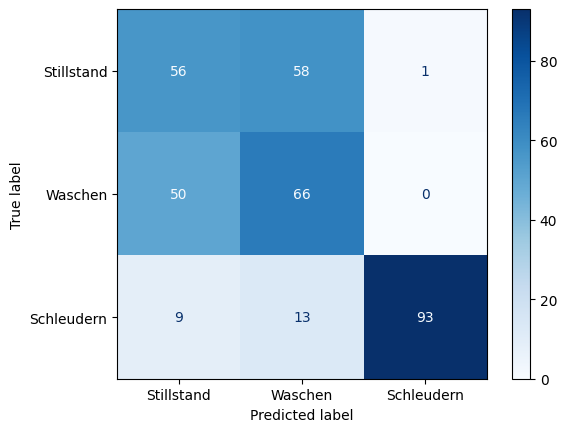

In [27]:
# erstellen des Reports und der Confusion Matrix

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

#cmap = mcolors.ListedColormap(['olive', 'red', 'lavender', 'blue', 'yellow'])
#disp.plot(cmap=cmap)

disp.plot(cmap=plt.cm.Blues)


plt.show()